In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./local_rewards_costs.xls')
# data = data.dropna()
data.head()

,Time stamp,Actual reward,Expected reward,Actual cost: dist,Actual cost: turn,Actual cost: trav,Actual cost: real_time,Expected cost: dist,Expected cost: turn,Expected cost: trav,Actual path length,Expected path length
0,103.020,1949.279175,2234.773438,5.143890,1.097377,0.193902,5.560,4.352918,7.294871,0.178128,5.152122,4.377252
1,107.096,1281.614990,1481.518677,2.123221,1.071390,0.157264,0.000,1.642659,1.479414,0.143657,2.124512,1.645740
2,110.204,1125.081665,1464.563843,1.900990,0.428747,0.207654,3.108,1.454545,2.937423,0.076629,1.904729,1.455992
3,110.204,1024.175537,1221.420654,1.163151,0.126379,0.133153,0.000,0.603512,3.007343,0.050667,1.165434,0.604153
4,116.188,396.127686,544.438354,0.000000,0.000000,0.000000,5.984,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# cost_coef = {'turn': 1.0, 'dist': 1.0, 'trav': 1.0}
# for cost_type in ['turn', 'dist', 'trav']:
#     actual_cost = np.array(data[f"Actual cost: {cost_type}"])
#     expected_cost = np.array(data[f"Expected cost: {cost_type}"])
#     ratios = actual_cost / (expected_cost+1e-6)
#     ratios = ratios[ratios!=0]
#     ratios = ratios[ratios < 100]
#     cost_coef[cost_type] = ratios.mean()
#     print(f'Mean Actual / Expected {cost_type} costs ratio: {cost_coef[cost_type]}')
#     # print(ratios.min(), ratios.max())
# print(cost_coef)

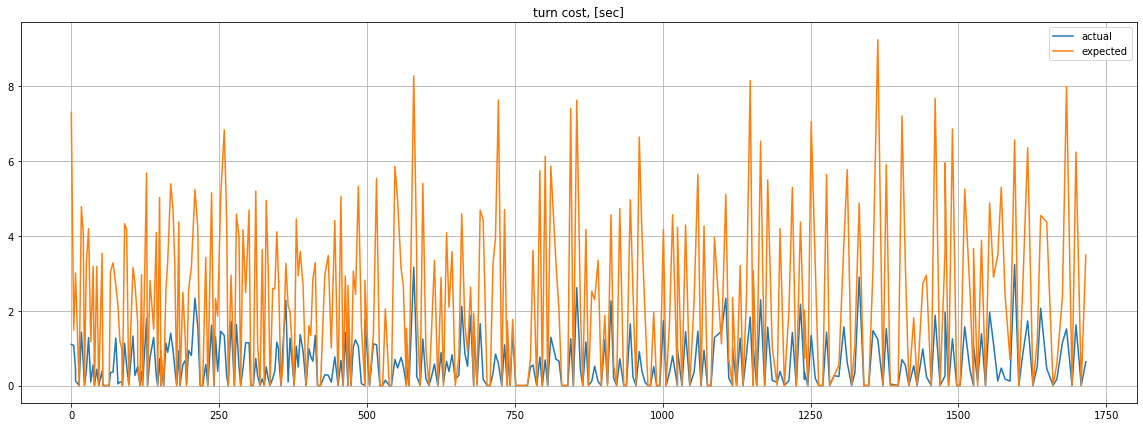

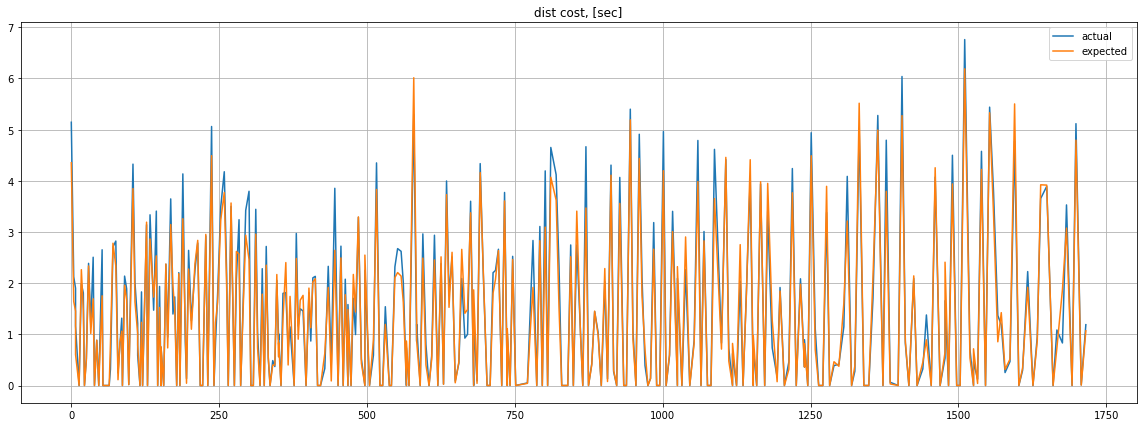

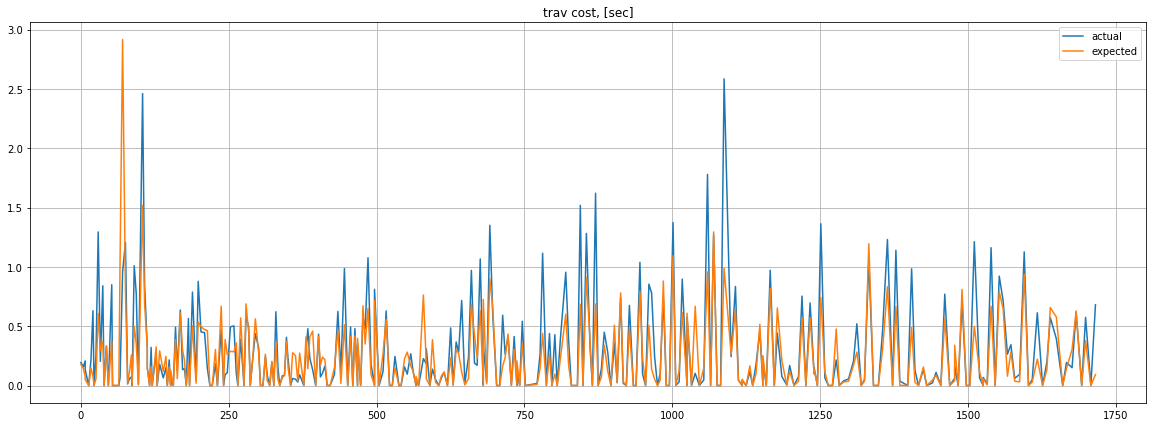

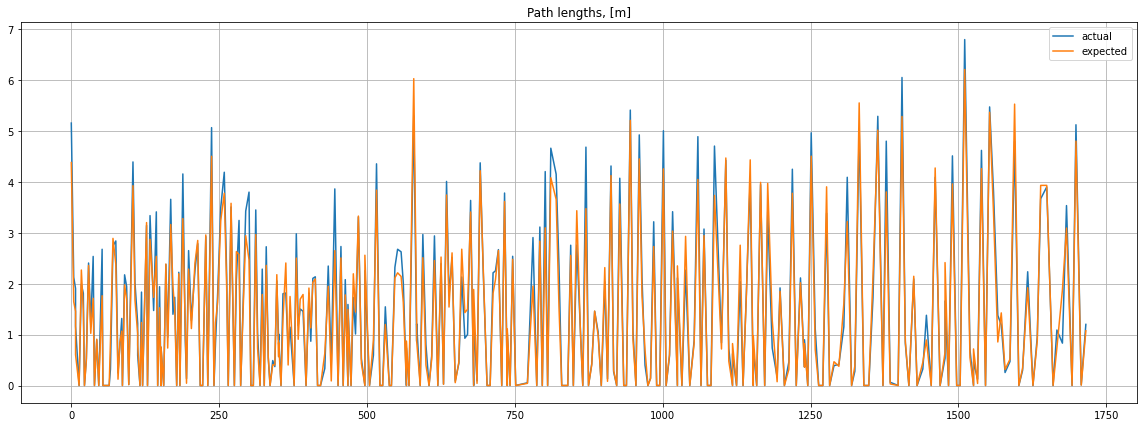

In [4]:
t = data["Time stamp"] - data["Time stamp"][0]

# individual cost components
for cost_type in ['turn', 'dist', 'trav']:
    plt.figure(figsize=(20, 7))
    plt.plot(t, data[f"Actual cost: {cost_type}"], label='actual')
    plt.plot(t, data[f"Expected cost: {cost_type}"], label='expected')
    plt.title(f"{cost_type} cost, [sec]")
    plt.grid()
    plt.legend()

# total cost

# plt.figure(figsize=(20, 7))
# plt.plot(t, data["Actual cost: real_time"], label='actual')
# total_expected_cost = data["Expected cost: dist"]+data["Expected cost: turn"]+data["Expected cost: trav"]
# plt.plot(t, total_expected_cost, label='expected')
# plt.title("Total cost, [sec]")
# plt.grid()
# plt.legend()

# path lengths comparison
plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual path length"], label='actual')
plt.plot(t, data["Expected path length"], label='expected')
plt.title("Path lengths, [m]")
plt.grid()
plt.legend();

Cost: turn
Found params: a=0.241666978820416, b=0.0
L2 diff before: 44.660070288956696
L2 diff now: 7.948155713429177
------------------------------

Cost: dist
Found params: a=1.0566663325802514, b=0.0
L2 diff before: 6.282085230779929
L2 diff now: 5.92511651573888
------------------------------

Cost: trav
Found params: a=1.0764017814777451, b=0.0
L2 diff before: 4.632406229288908
L2 diff now: 4.599672256425806
------------------------------



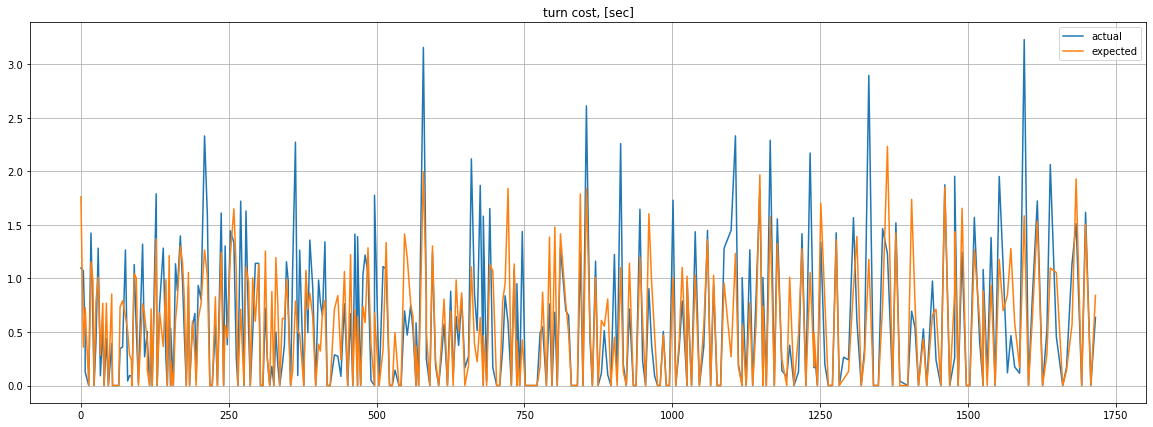

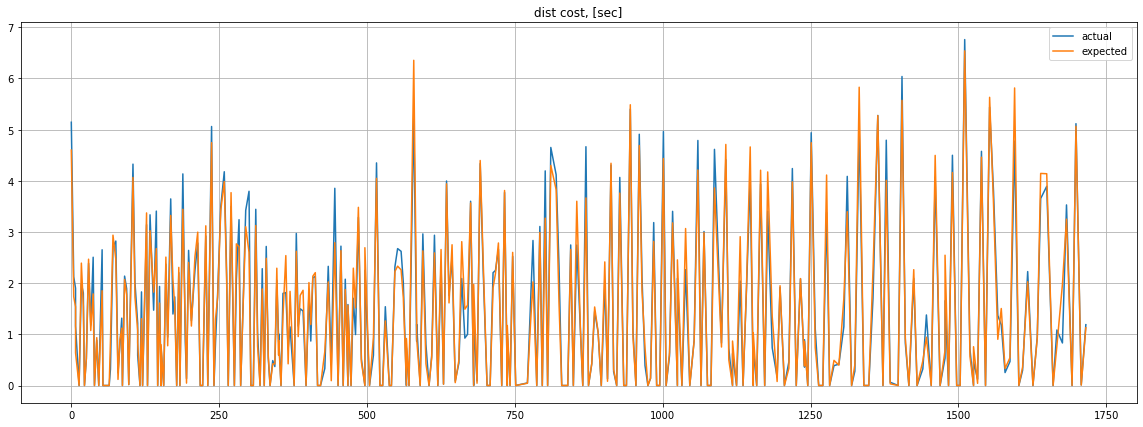

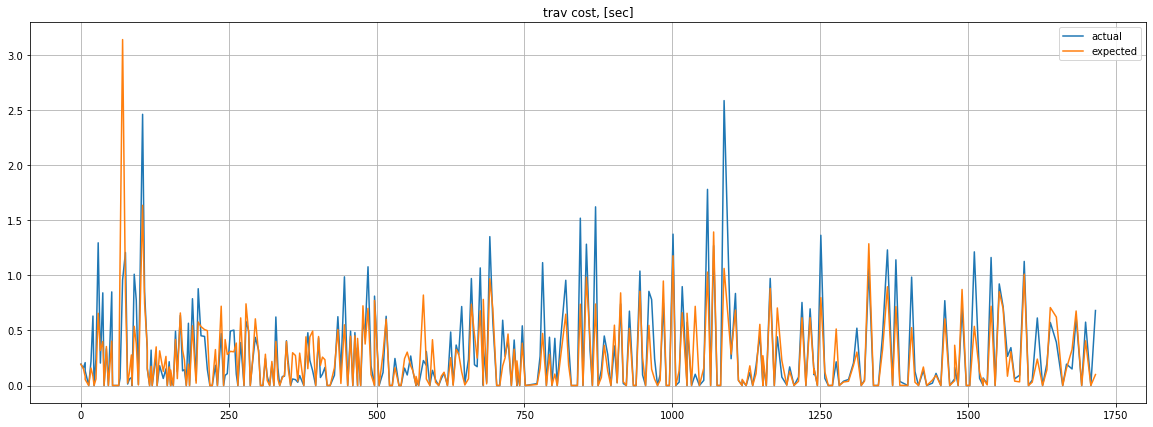

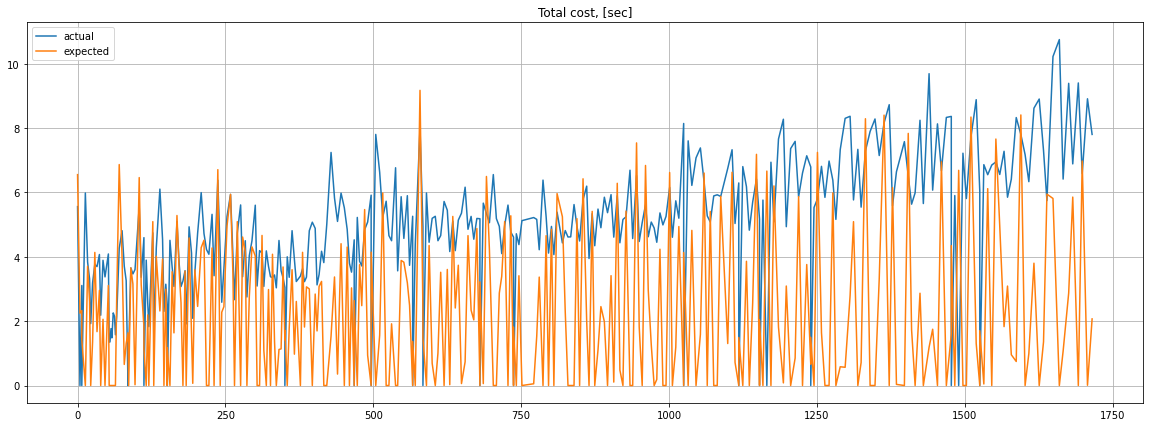

In [5]:
from scipy.optimize import curve_fit

# def f(x, a, b):
#     return a * x + b
def f(x, a):
    return a*x

total_expected_cost = 0.0

for cost_type in ['turn', 'dist', 'trav']:
    X = np.array(data[f'Expected cost: {cost_type}'])
    Y = np.array(data[f'Actual cost: {cost_type}'])
    
    # params0 = [1.0, 0.0]
    params0 = [1.0]
    params_opt, _ = curve_fit(f, X, Y, params0)
    # a, b = params_opt
    a, b = params_opt[0], 0.0
    
    # total_expected_cost += a*X+b
    total_expected_cost += a*X
    
    plt.figure(figsize=(20, 7))
    plt.plot(t, Y, label='actual')
    plt.plot(t, a*X+b, label='expected')
    plt.title(f"{cost_type} cost, [sec]")
    plt.grid()
    plt.legend();
    
    print("Cost:", cost_type)
    print(f"Found params: a={a}, b={b}")
    print("L2 diff before:", np.linalg.norm(X - Y))
    print("L2 diff now:", np.linalg.norm(a*X+b - Y))
    print(30*"-"+"\n")
    
    
plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: real_time"], label='actual')
plt.plot(t, total_expected_cost, label='expected')
plt.title("Total cost, [sec]")
plt.grid()
plt.legend()